### KNN And SVM

K - nearest neighbours
Support Vector Machine
They are used for smaller dataset upto 1000 rows it takes alot of time

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step1- Data Ingestion

In [2]:
import pandas as pd
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## Step 2- Seperate X and Y

In [10]:
Y=df[["Drug"]]
X=df.drop(columns="Drug")

In [11]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [12]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [17]:
cat=list(X.columns[X.dtypes=="object"])
con=list(X.columns[X.dtypes!="object"])

<Axes: xlabel='Drug'>

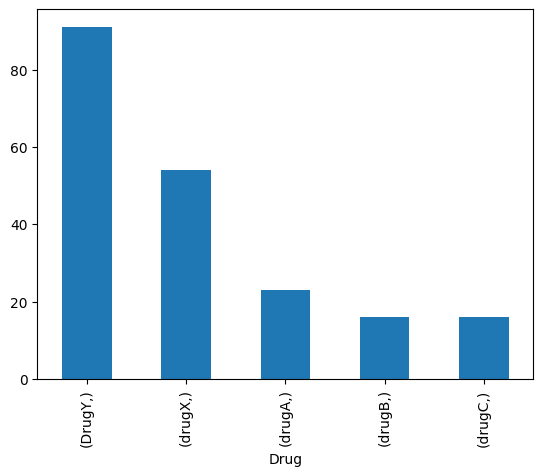

In [16]:
Y.value_counts().plot(kind="bar")

In [18]:
cat

['Sex', 'BP', 'Cholesterol']

In [19]:
con

['Age', 'Na_to_K']

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


numpipe=make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())
catpipe=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore",sparse_output=False))

In [21]:
from sklearn.compose import ColumnTransformer


pre=ColumnTransformer(
    [
        ("num",numpipe,con),
        ("cat",catpipe,cat)
    ]
).set_output(transform="pandas")

In [22]:
X_pre=pre.fit_transform(X)

In [23]:
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [24]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.4,random_state=42)

In [25]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
77,-1.109805,0.426945,1.0,0.0,1.0,0.0,0.0,0.0,1.0
46,-0.443255,-0.415423,1.0,0.0,1.0,0.0,0.0,1.0,0.0
187,0.162699,-0.788452,0.0,1.0,1.0,0.0,0.0,1.0,0.0
191,-1.291591,-1.120403,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [26]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [27]:
ytrain.head()

,Drug
2,drugC
77,DrugY
46,drugA
187,drugA
191,drugA


In [28]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


Step 6 -Model Building 

In [30]:
# from sklearn.kernel_ridge import KernelRidge_Self
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=30)
model1.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=30)

In [31]:
model1.score(xtrain,ytrain)

0.7583333333333333

In [32]:
model1.score(xtest,ytest)

0.75

### Hyperparamter Tuning

In [33]:
params={
    "n_neighbors":[6,7,8,9,10,11,12,13,14]
    
}

In [34]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
gscv=GridSearchCV(knn,param_grid=params,cv=5,scoring="f1_macro")
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 13, 14]},
             scoring='f1_macro')

In [35]:
gscv.best_params_

{'n_neighbors': 9}

In [36]:
gscv.best_score_

np.float64(0.872952413769805)

In [37]:
best_knn=gscv.best_estimator_

In [38]:
best_knn

KNeighborsClassifier(n_neighbors=9)

## Model Evaluation for KNN``

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
best_knn.score(xtrain,ytrain)

0.85

In [41]:
best_knn.score(xtest,ytest)

0.8875

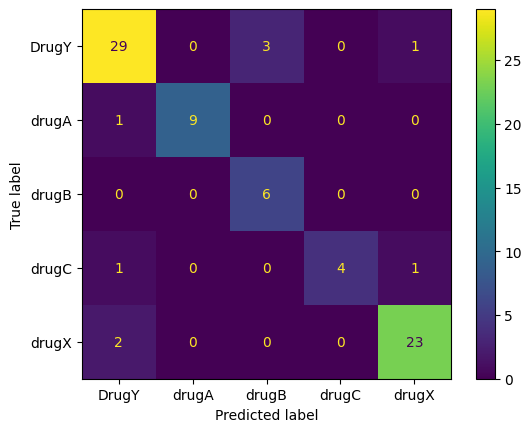

In [42]:
ConfusionMatrixDisplay.from_estimator(best_knn,xtest,ytest)

In [43]:
from sklearn.metrics import classification_report
ypred_test=best_knn.predict(xtest)

ytest.head()

# print(classification_report())

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [44]:
ypred_test[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [45]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

       DrugY       0.88      0.88      0.88        33
       drugA       1.00      0.90      0.95        10
       drugB       0.67      1.00      0.80         6
       drugC       1.00      0.67      0.80         6
       drugX       0.92      0.92      0.92        25

    accuracy                           0.89        80
   macro avg       0.89      0.87      0.87        80
weighted avg       0.90      0.89      0.89        80



### Support Vector Machine

In [46]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)

In [47]:
svm_model.fit(xtrain,ytrain)

SVC(probability=True)

In [48]:
svm_model.score(xtrain,ytrain)

0.9833333333333333

In [49]:
svm_model.score(xtest,ytest)

0.925

In [50]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svm_model,xtrain,ytrain,cv=5,scoring="f1_macro")

In [51]:
scores

array([0.89848485, 0.95      , 0.82666667, 0.83506494, 0.84463768])

In [52]:
scores.mean(
    
)

np.float64(0.870970826275174)

### Plot Confusion Matrix

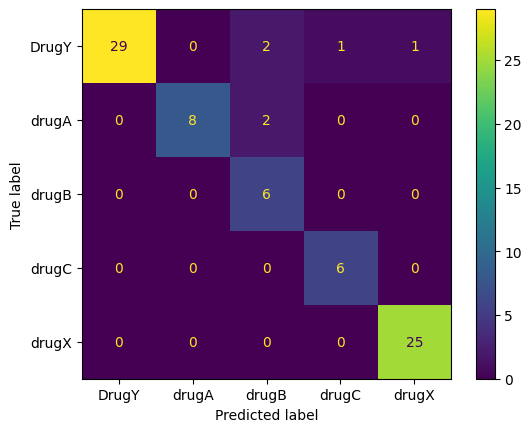

In [53]:
ConfusionMatrixDisplay.from_estimator(svm_model,xtest,ytest)

In [54]:
ypred_test2=svm_model.predict(xtest)
ypred_test2[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [55]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [56]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

       DrugY       1.00      0.88      0.94        33
       drugA       1.00      0.80      0.89        10
       drugB       0.60      1.00      0.75         6
       drugC       0.86      1.00      0.92         6
       drugX       0.96      1.00      0.98        25

    accuracy                           0.93        80
   macro avg       0.88      0.94      0.90        80
weighted avg       0.95      0.93      0.93        80



### From above results SVM is Better Model

In [57]:
xnew=pd.read_csv("Drugs_test.csv")
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,40,F,LOW,NORMAL,11.349
1,40,F,NORMAL,HIGH,10.103
2,36,F,NORMAL,HIGH,16.753
3,50,F,NORMAL,HIGH,12.703
4,34,F,HIGH,NORMAL,19.199


In [58]:
xnew_pre=pre.transform(xnew)

In [59]:
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-0.261469,-0.657170,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.261469,-0.830085,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.503851,0.092774,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.344485,-0.469268,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.625042,0.432219,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [60]:
preds=svm_model.predict(xnew_pre)

In [61]:
preds

array(['drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX',
       'drugX', 'DrugY', 'drugA', 'DrugY', 'drugX', 'drugB', 'DrugY',
       'drugC', 'drugC', 'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'drugA', 'drugX', 'drugB', 'drugC',
       'drugB', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugB', 'drugX', 'DrugY', 'DrugY', 'drugC',
       'DrugY', 'drugA', 'drugB', 'DrugY', 'drugX', 'drugC', 'drugB',
       'drugA'], dtype=object)

In [62]:
xnew["Prediction_Drugs"]=preds

In [70]:
probs=svm_model.predict_proba(xnew_pre)
probs[0:5]

array([[0.02450613, 0.01775248, 0.01260298, 0.02355326, 0.92158515],
       [0.02983507, 0.02673145, 0.01081151, 0.02852369, 0.90409828],
       [0.84440747, 0.01185793, 0.00517728, 0.01302425, 0.12553307],
       [0.19630976, 0.02153596, 0.01505176, 0.02641836, 0.74068415],
       [0.96750427, 0.02017155, 0.00431284, 0.00366831, 0.00434303]])

In [71]:
xnew[svm_model.classes_]=probs

In [72]:
xnew.to_csv("result.csv",index=False)

In [65]:
import joblib
joblib.dump(pre,"pre.joblib")
joblib.dump(svm_model,"svm.joblib")

['svm.joblib']

In [66]:
joblib.load("pre.joblib")

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [67]:
joblib.load("svm.joblib")

SVC(probability=True)

In [73]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Prediction_Drugs,DrugY,drugA,drugB,drugC,drugX
0,40,F,LOW,NORMAL,11.349,drugX,0.024506,0.017752,0.012603,0.023553,0.921585
1,40,F,NORMAL,HIGH,10.103,drugX,0.029835,0.026731,0.010812,0.028524,0.904098
2,36,F,NORMAL,HIGH,16.753,DrugY,0.844407,0.011858,0.005177,0.013024,0.125533
3,50,F,NORMAL,HIGH,12.703,drugX,0.196310,0.021536,0.015052,0.026418,0.740684
4,34,F,HIGH,NORMAL,19.199,DrugY,0.967504,0.020172,0.004313,0.003668,0.004343
5,72,M,LOW,HIGH,16.310,DrugY,0.947714,0.004435,0.009390,0.023452,0.015010
6,69,M,LOW,NORMAL,11.455,drugX,0.185974,0.018827,0.054050,0.079487,0.661662
7,17,M,NORMAL,NORMAL,10.832,drugX,0.031256,0.025832,0.011834,0.009684,0.921393
8,57,F,NORMAL,HIGH,14.216,DrugY,0.517857,0.014097,0.016771,0.020495,0.430779
9,38,F,HIGH,NORMAL,11.326,drugA,0.049981,0.819600,0.074302,0.018966,0.037151
